# Data Science 325 - hw

### Learning Objectives:

* Students will learn the motivation for dimensionality reduction techniques.
* Students will be exposed to two algorithmic approaches to dimensionality reduction: principal component analysis (PCA) and t-SNE
* Students will practice the application of PCA with a plot for gaining visual insight into higher-dimensional data.

## load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns; 
sns.axes_style("whitegrid")
sns.set_context("paper")
np.random.seed(0)

In [2]:
print(plt.style.available)
plt.style.use('seaborn-dark')
# https://fredriccliver.medium.com/cant-not-see-axis-label-of-jupyter-notebook-in-the-dark-theme-vscode-df31a3ee121

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# Exercises

For these exercises, you will both add on to this Jupyter Notebook to show your work after each corresponding code block comment below.

Using the wineAll.csv, complete the following exercises.

In [3]:
#Loading Data set
wine = pd.read_csv("http://public.gettysburg.edu/~jpuckett/ds325/data/wine-quality.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.0


## attribute information

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):

Description of the Variables

1. fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2. volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3. citric acid: found in small quantities, citric acid can add ‘freshness’ and flavor to wines

4. residual sugar: the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5. chlorides: the amount of salt in the wine

6. free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7. total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8. density: the density of water is close to that of water depending on the percent alcohol and sugar content

9. pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10. sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11. alcohol: the percent alcohol content of the wine

Output variable (based on sensory data): 

12. quality (score from 3 to 9)
13. color (0 white, 1 red)

Data from:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Exercise 1

Using the **wine-quality** dataset.
* Make your target variable **y** the wine **color** (0=red,1=white)
* Make an **X** matrix of the wine data, which excludes **color** and **quality**.


    a. Use **un-scaled** or raw **X** data to perform a PCA
        i. Plot the projected data onto 2 dimensions (the eigenvectors with the largest eigenvalues). Color the data based on the wine color.
        ii. Make a plot of the value of the **explained variance** as we did for MNIST.
        
        
    b. Now use StandardScalar to transform the **X** data
        i. Plot the projected data onto 2 dimensions using PCA (the eigenvectors with the largest eigenvalues). Color the data based on the wine color.
        ii. Make a plot of the value of the **explained variance**

### Exercise 1a

In [4]:
#prepare the data to X and y
X = wine.drop(['color','quality'], axis = 1)
y = np.ravel(wine['color'])
wine_color_label = ['white','red']
y_quality = np.ravel(wine['quality'])
inx = y==0 #is the wine a white wine?  since 0s are white, this is true for all white wine elements

In [5]:
#perform PCA
pca = PCA(n_components=2)

In [6]:
X_pca_unscaled = pca.fit_transform(X)
# XXX = X_pca_unscaled[inx]
# display(XXX)
# print(XXX.size)
# display(X_pca_unscaled[inx,1])

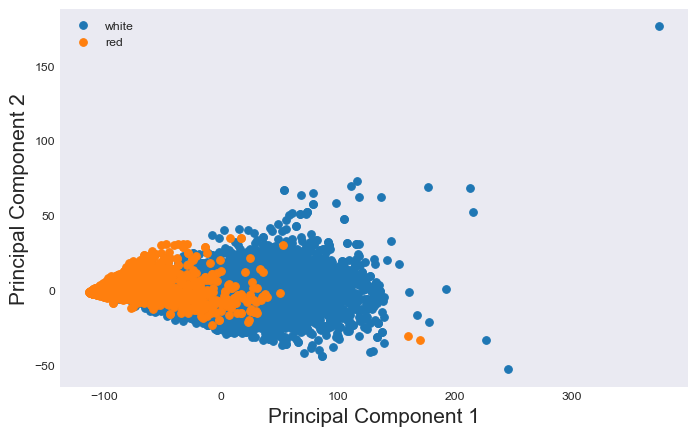

In [7]:
#plot projected data onto PCA1 and PCA2
fig = plt.figure(figsize = (8.1,5),dpi=100)
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
for i in (np.unique(y)):
    inn = (y == i).ravel()
    ax.scatter(X_pca_unscaled[inn,0],X_pca_unscaled[inn,1],s=30)

# plt.scatter(X_pca_unscaled[~inn,0],X_pca_unscaled[~inn,1], label='white')
# plt.scatter(X_pca_unscaled[inn,0],X_pca_unscaled[inn,1], label='red')

ax.legend(wine_color_label)
plt.show()

Text(0, 0.5, 'cumulative explained variance')

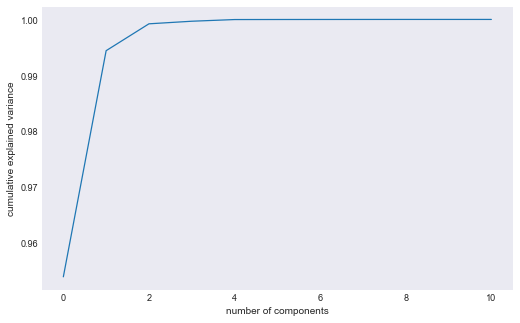

In [8]:
#plot explained variance
pca = PCA().fit(X)
fig = plt.figure(figsize = (8.1,5),dpi=75)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### Exercise 1b

Normalization is important in PCA since it is a variance maximizing exercise. It projects your original data onto directions which maximize the variance. 

In [9]:
# use StandardScaler() to transform/normalize features
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [10]:
#perform PCA to reduce the number of dimensions to 2
pca = PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)


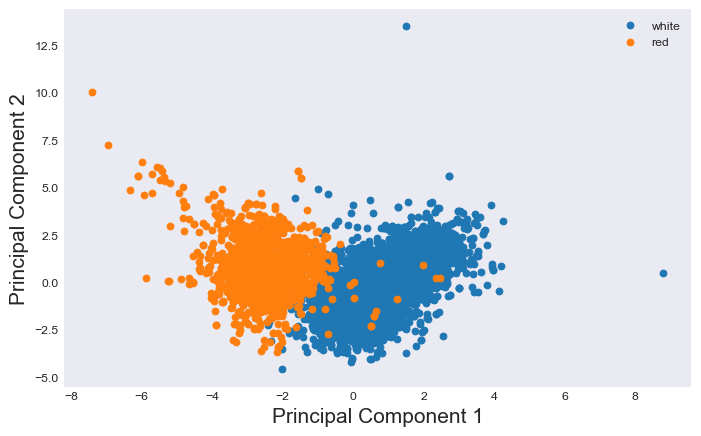

In [11]:
#plot projected data
fig = plt.figure(figsize = (8.1,5),dpi=100)
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
# for i in (np.unique(y)):
#     inn = (y == i).ravel()
#     ax.scatter(X_pca_scaled[inn,0],X_pca_scaled[inn,1],s=30)

plt.scatter(X_pca_scaled[~inn,0],X_pca_scaled[~inn,1], label='white')
plt.scatter(X_pca_scaled[inn,0],X_pca_scaled[inn,1], label='red')

ax.legend(wine_color_label)
plt.show()

#### your comments here

Before scaling, the number of white wine observations is much more that that number of red wine observation, so the result is that is it hard to cluster these two colors. However, after scaling, it appears two different clusters corresponding to each color of wine


## Exercise 2
#### Dimensional reduction with t-SNE

a)  Use t-SNE to project the raw/unscaled wine dataset onto 2 dimensions. Use perplexity=30 and random_state=0.

b) Plot the data and color by the wine color (red/white).


In [12]:
#compute TSNE
tsne = TSNE(random_state=0, perplexity=30)
X_tsne_raw = tsne.fit_transform(X)

C:\Users\quannh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\quannh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


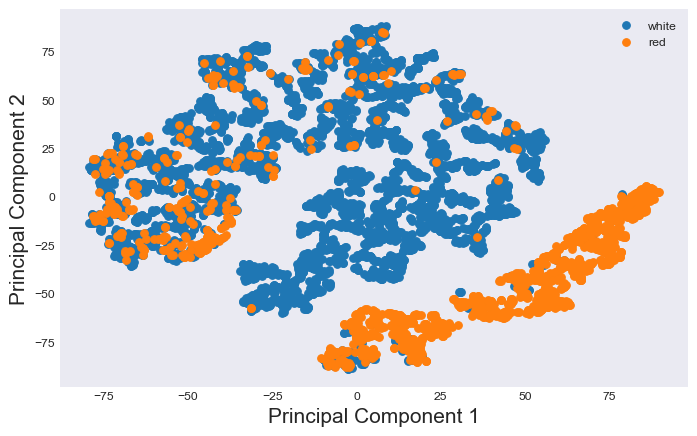

In [13]:
#plot TSNE projected data
fig = plt.figure(figsize = (8.1,5),dpi=100)
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
for i in (np.unique(y)):
    inn = (y == i).ravel()
    ax.scatter(X_tsne_raw[inn,0],X_tsne_raw[inn,1],s=30)
ax.legend(wine_color_label)
plt.show()

#### your comments here

Without scaler and pca, t-SNE still can cluster the data into two different groups, but there are still a lot of observations are clustered into wrong group

## Exercise 3
#### Dimensional reduction with t-SNE

a) Use a standard scaler, use PCA to reduce the wine dataset to 4 dimensions

b) Use t-SNE (with **perplexity=40**) to project onto 2 dimensions. Plot the data and color by the wine color (red/white).

In [14]:
# a) perform PCA to reduce X to 4 dimensions
scale = StandardScaler()
x_scale = scale.fit_transform(X)
pca = PCA(n_components=4)
x_PCA_scale = pca.fit_transform(x_scale)

In [15]:
# b) perform tSNE on x_PCA
X_tsne_pca_scale = TSNE(perplexity=40).fit_transform(x_PCA_scale)

C:\Users\quannh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\quannh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


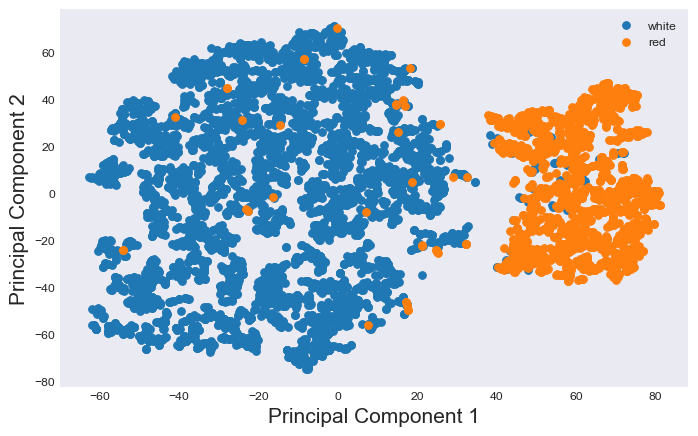

In [16]:
# plot TSNE projected data
fig = plt.figure(figsize = (8.1,5),dpi=100)
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
for i in (np.unique(y)):
    inn = (y == i).ravel()
    ax.scatter(X_tsne_pca_scale[inn,0],X_tsne_pca_scale[inn,1],s=30)
ax.legend(wine_color_label)
plt.show()

#### your comments here
After using pca, two groups of red-white wines are cluster into 2 different groups

## Exercise 4

a) What is the difference between feature selection and PCA?

b) Choice of algorithm. What is the difference between LDA and PCA?  Why and when do we use one over the other? When should we try something else like tSNE?

c) Why do you think scaling is necessary for PCA?

d) Why do you think it may be necessary to use PCA before tSNE?

#### your answers here

a)
- Feature selection: choose only those features that are important to use as predictor. Ridge and Lasso can be used for feature selection since they reduce or set the coeficient of those less important features to 0. Mostly feature selection is used in supervised learning
- PCA: reduce the dimension (variances) which makes model easier to handle, but does not eliminate any features

b)
- LDA vs PCA:
    - PCA is an unsupervised and has no concern with the class labels.
    - LDA is a supervised dimensionality reduction technique
    - Unlike PCA, LDA tries to reduce dimensions of the feature set while retaining the information that discriminates output classes
    - However, they are both used in dimension reduction
- tSNE is used to model the distances between points in the low-dimensional map

c) PCA helps maximize variance between feature elements. If the data has different weights between feature, and without scaling, PCA will lean on the more weighted data

d) Because PCA:
- PCA is much faster than t-SNE for large datasets. PCA also preserves the global data structure
- It needs to run once only since it is deterministic.
Then we use tSNE to:
- Produces well-separated clusters. With large perplexity parameter, it can help to preserve the global geometry of data

#### below are exercises on dimensional reduction

## Exercise 5

Using the **wine-quality** dataset. Make an **X** matrix of the wine data, which excludes **type** and **quality**.

i) Follow the steps from Exercise 4 to use PCA to reduce dimensionality to **dim=4**, and then use tSNE to reduce the dimensionality to dim=2 for the data. Note this is repeats Exercise 4, but we plan to change the perplexity for each problem below.

#### However, here we want to examine 3 different perplexities **(20,40,80)**.

b) Follow step i) above, using **perplexity=20** for tSNE.

    i) Use kMeans to cluster the data. Make a plot to compare with the data plotted with colors for the wine type (white or red).
    ii) Use DBSCAN to cluster the data.  Compare how the result of DBSCAN depends on epsilon (plot the results for a few values of episilon).  Which does the best?

b) Follow step i) above, using **perplexity=60** for tSNE.

    i) Use kMeans to cluster the data. Make a plot to compare with the data plotted with colors for the wine type (white or red).
    ii) Use DBSCAN to cluster the data.  Compare how the result of DBSCAN depends on epsilon (plot the results for a few values of episilon).  Which does the best?


c) Which is the better solutions for this data? If you choose DBSCAN how did you choose the hyperparameters? 


In [17]:
wine = pd.read_csv("http://public.gettysburg.edu/~jpuckett/ds325/data/wine-quality.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.0


In [18]:
#prepare the data to X and y
X = wine.drop(['color','quality'], axis = 1)
y = np.ravel(wine['color'])
wine_color_label = ['white','red']
y_quality = np.ravel(wine['quality'])
inx = y==0 #is the wine a white wine?  since 0s are white, this is true for all white wine elements

In [19]:
#a) transform/normalize features, use PCA to reduce to 4 dimensions, then use TSNE to further reduce to dim=2
scale = StandardScaler()
x_scale = scale.fit_transform(X)
pca = PCA(n_components=4)
x_PCA_scale = pca.fit_transform(x_scale)

# b) perform tSNE on x_PCA
# X_tsne_pca_scale = TSNE(perplexity=40).fit_transform(x_PCA_scale)

### Exercise 5a: perplexity=20

In [20]:
#tSNE with perplexity=20
tsne = TSNE(n_components=2, perplexity=20, random_state=0)
X_tsne_pca_scale = tsne.fit_transform(x_PCA_scale)

C:\Users\quannh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\quannh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


### Perplexity=20, kMeans

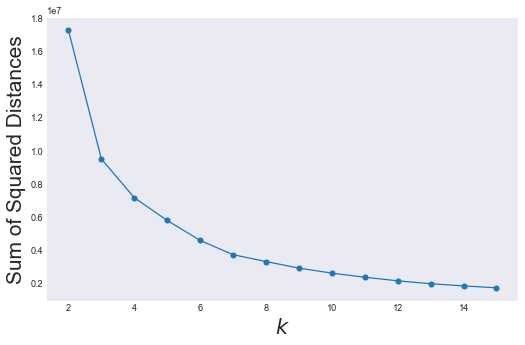

In [21]:
kMax = 15
ks  = np.linspace(2,kMax,kMax-1).astype(int)
e_score = np.zeros(ks.shape)
for i,k in enumerate(ks):
    kmeans = KMeans(n_clusters = k).fit(X_tsne_pca_scale)
    e_score[i] = kmeans.inertia_  ## -kmeans.score(X)  
    
fig = plt.figure(figsize = (8.1,5),dpi=75)
plt.plot(ks,e_score,'o-');
plt.xlabel('$k$', fontsize=20)
plt.ylabel('Sum of Squared Distances', fontsize=20);

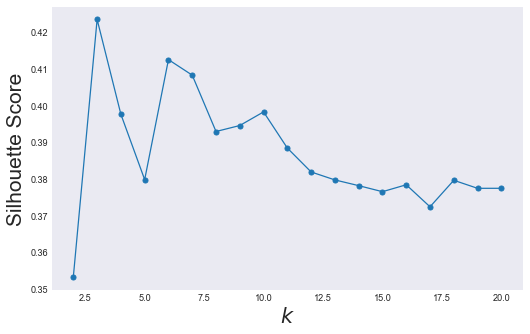

In [22]:
kMax = 20
ks  = np.linspace(2,kMax,kMax-1).astype(int)
s_score = np.zeros(ks.shape)
for i,k in enumerate(ks):
    kmeans = KMeans(n_clusters = k).fit(X_tsne_pca_scale)
    #kmeans = KMeans(n_clusters = k).fit(X_std)    
    labels = kmeans.labels_
    s_score[i] = silhouette_score(X_tsne_pca_scale, labels, metric = 'euclidean')

fig = plt.figure(figsize = (8.1,5),dpi=75)
plt.plot(ks,s_score,'o-');
plt.xlabel('$k$', fontsize=20)
plt.ylabel('Silhouette Score', fontsize=20);

In [23]:
k_best = (int) (ks[s_score == np.max(s_score)])
print(k_best)

3


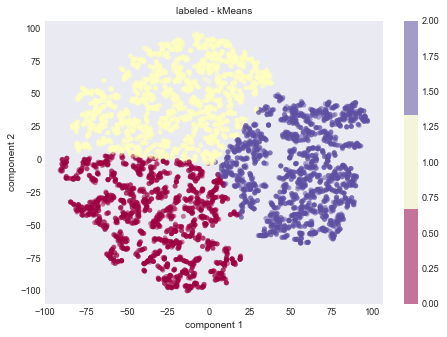

In [24]:
#plots for perplexity=20
kBest = 3
kmeans = KMeans(n_clusters = kBest).fit(X_tsne_pca_scale)
#kmeans = KMeans(n_clusters = kBest).fit(X_std)
labels = kmeans.labels_
fig = plt.figure(figsize = (16,5),dpi=75)
fig.add_subplot(121)   #top left
plt.scatter(X_tsne_pca_scale[:, 0], X_tsne_pca_scale[:, 1],c=labels, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Spectral', kBest))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('labeled - kMeans')
plt.colorbar();

### Perplexity=20, DBSCAN

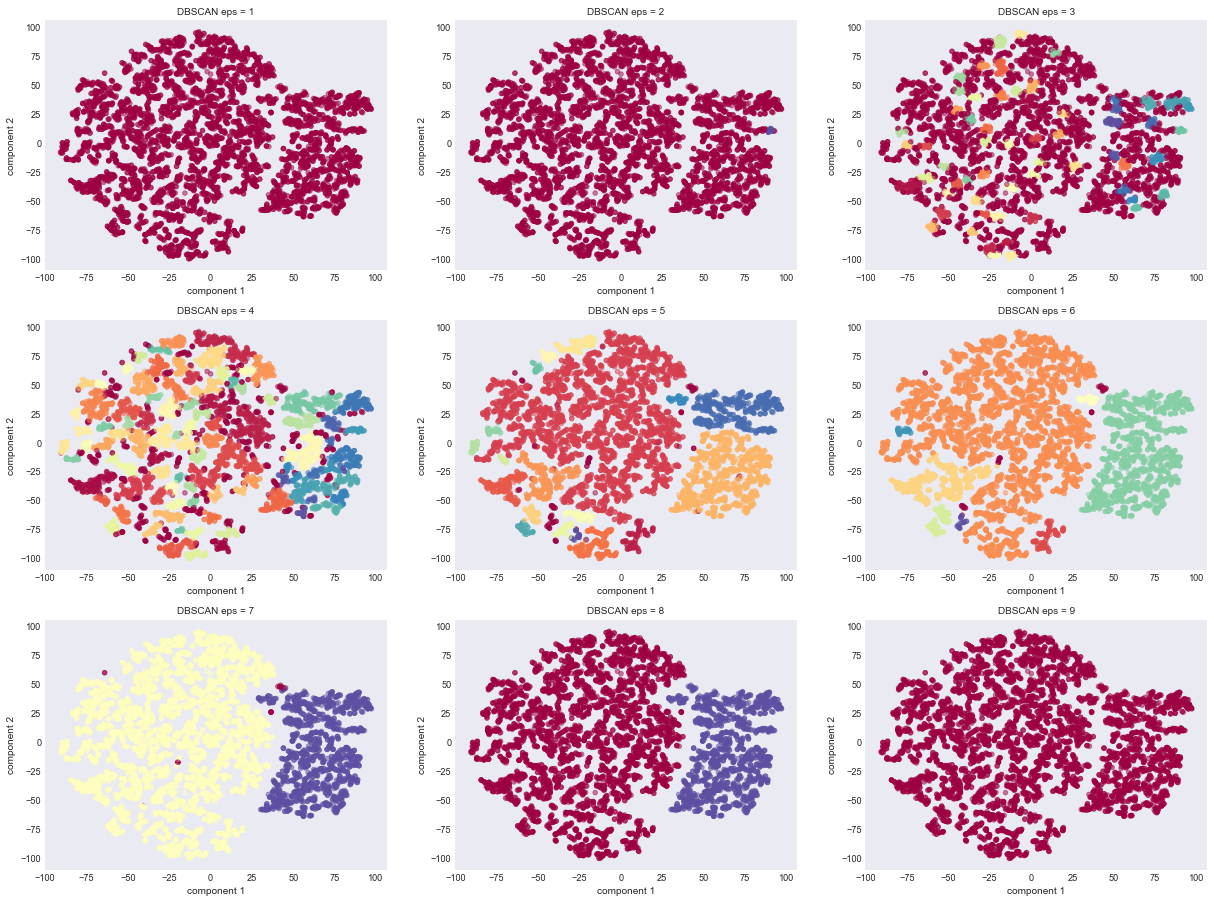

In [25]:
#plots for perplexity=20
# db = DBSCAN(eps=3, min_samples=10).fit(X_tsne_pca_scale)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# fig = plt.figure(figsize = (16,5),dpi=75)
# fig.add_subplot(121)   #top left
# plt.scatter(X_tsne_pca_scale[:, 0], X_tsne_pca_scale[:, 1], c=db.labels_, s=20, alpha=0.5,cmap='Spectral');
# plt.xlabel('component 1')
# plt.ylabel('component 2')
# plt.title('labeled - DBSCAN')
# plt.colorbar();

# eps_array = np.array([2, 4, 6, 8, 10])
eps_array = np.linspace(1, 9, num=9)
fig, ax = plt.subplots(3, 3,figsize=(20,15),dpi=75)
ax = ax.flat
for i in range(eps_array.shape[0]):
    my_eps = eps_array[i]
    db = DBSCAN(eps=my_eps, min_samples=20).fit(X_tsne_pca_scale)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    ax[i].scatter(X_tsne_pca_scale[:, 0], X_tsne_pca_scale[:, 1], c=db.labels_, s=20, alpha=0.5,cmap='Spectral');
    ax[i].set_xlabel('component 1')
    ax[i].set_ylabel('component 2')
    ax[i].set_title('DBSCAN eps = %d'%my_eps)


#### your comment about DBSCAN v kMeans in clustering the data




### Exercise 5b: perplexity=60

In [26]:
#tSNE with perplexity=60
tsne = TSNE(n_components=2, perplexity=60, random_state=0)
X_tsne_pca_scale = tsne.fit_transform(x_PCA_scale)

C:\Users\quannh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\quannh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


### Perplexity=60, kMeans

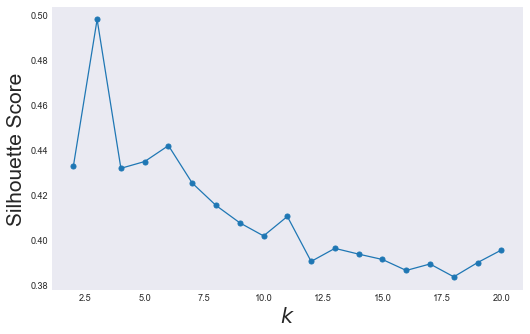

In [27]:
kMax = 20
ks  = np.linspace(2,kMax,kMax-1).astype(int)
s_score = np.zeros(ks.shape)
for i,k in enumerate(ks):
    kmeans = KMeans(n_clusters = k).fit(X_tsne_pca_scale)
    labels = kmeans.labels_
    s_score[i] = silhouette_score(X_tsne_pca_scale, labels, metric = 'euclidean')

fig = plt.figure(figsize = (8.1,5),dpi=75)
plt.plot(ks,s_score,'o-');
plt.xlabel('$k$', fontsize=20)
plt.ylabel('Silhouette Score', fontsize=20);

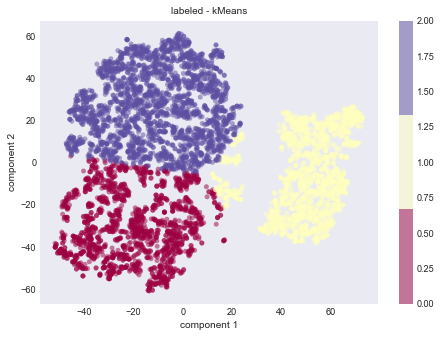

In [29]:
#plots for perplexity=60
kBest = 3
kmeans = KMeans(n_clusters = kBest).fit(X_tsne_pca_scale)
labels = kmeans.labels_
fig = plt.figure(figsize = (16,5),dpi=75)
fig.add_subplot(121)   #top left
plt.scatter(X_tsne_pca_scale[:, 0], X_tsne_pca_scale[:, 1],c=labels, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Spectral', kBest))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('labeled - kMeans')
plt.colorbar();

### Perplexity=60, DBSCAN

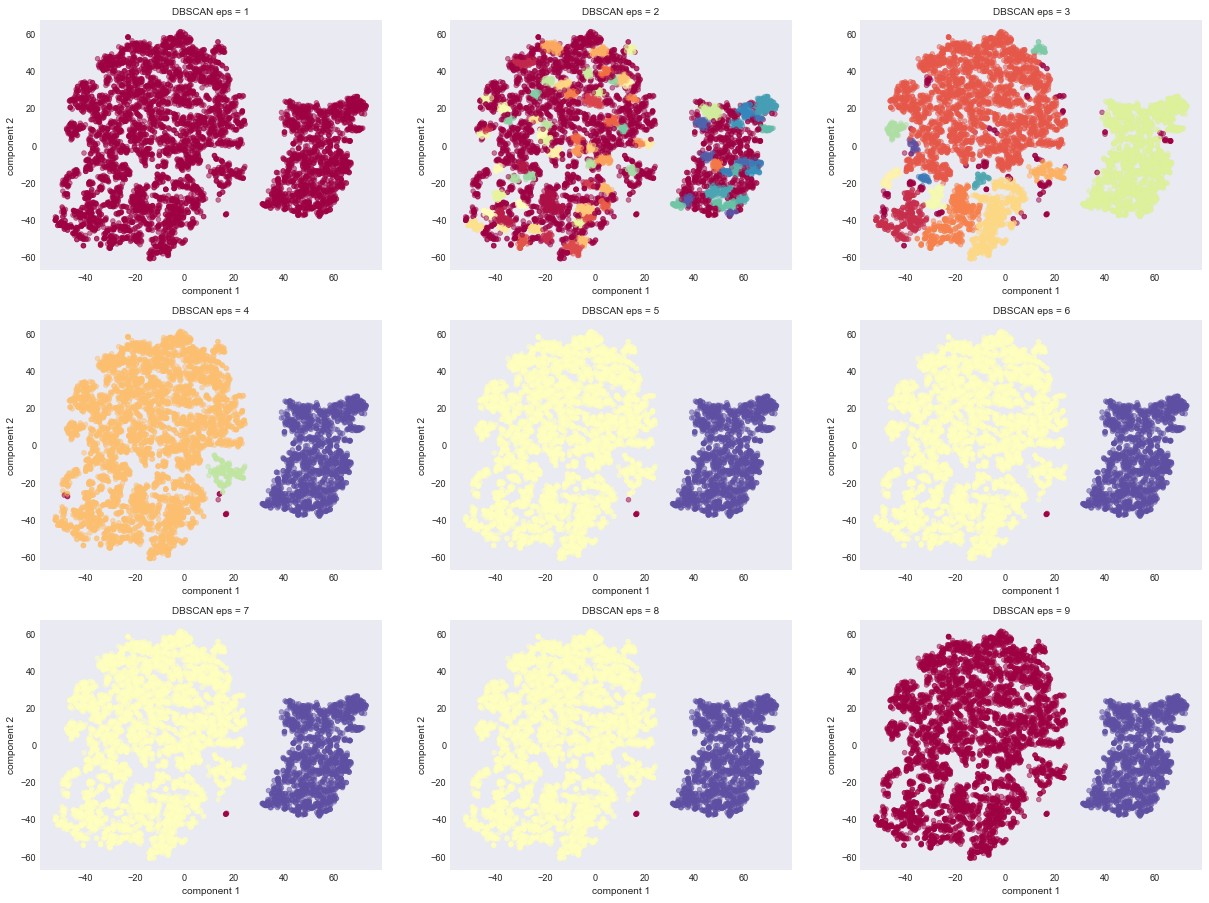

In [30]:
#DBSCAN plots for perplexity=60

# eps_array = np.array([2, 4, 6, 8, 10])
eps_array = np.linspace(1, 9, num=9)
fig, ax = plt.subplots(3, 3,figsize=(20,15),dpi=75)
ax = ax.flat
for i in range(eps_array.shape[0]):
    my_eps = eps_array[i]
    db = DBSCAN(eps=my_eps, min_samples=20).fit(X_tsne_pca_scale)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    ax[i].scatter(X_tsne_pca_scale[:, 0], X_tsne_pca_scale[:, 1], c=db.labels_, s=20, alpha=0.5,cmap='Spectral');
    ax[i].set_xlabel('component 1')
    ax[i].set_ylabel('component 2')
    ax[i].set_title('DBSCAN eps = %d'%my_eps)


#### your comments about DBSCAN v kMeans in clustering the data




## Exercise 6
  
    a) It is common to run K-Means clustering several times for the same value of K to get different results.  What is the reason why the results different from one run to another?
    b) How do you choose the best run?    
    c) Name three shortcomings of the k-means algorithm. 
    d) Explain how these shortcomings can be remedied (or not) using Gaussian Mixed model or DBSCAN.  Does DBSCAN have any disadvantages?

#### your answer here


a) Yes, because the centroids are chosen randomly each run. Each time, it updates at a finite numbers so that centroids are in right position. However, it may happen when kmeans stucks in a local and cannot reaches the global optimum, so the results are different


b) There are 2 ways to find the best k:
- Use elbow techniques by trying various values of k, compare the inertia value. Choose k if the inertia decreasing less rapidly
- Use silhouette score for the best k


c)
- Trouble with different cluster sizes: Trying to minimize the within-cluster sum of squares, the k-means algorithm gives more “weight” to larger clusters.
- Sensitive to outliers
- Performs badly when clusters are non-convex or rest on a complex manifold


d)
- DBSCAN is NOT sensitive to outliers.
- The clusters formed by DBSCAN can be any shape, which makes it robust to different types of data.
- GMM: Rather than identifying clusters by “nearest” centroids, the data is fit with a set of k gaussians, so in GMM, we don't need to find the best k as in KMeans


Limitations of DBScan:
- When the data has a large variation in densities across clusters because we can use a pair of parameters, which are epsilon and MinPts, on one dataset. Besides, it could be difficut to define epsilon without the domain knowledge of the data